In [7]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer

# Load the dataset
df = pd.read_csv('IMDB Dataset.csv', encoding='ISO-8859-1')

# Text preprocessing
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# Clean the reviews
df['review'] = df['review'].apply(clean_text)

# Data augmentation functions
def synonym_replacement(text, n=1):
    words = text.split()
    new_words = words.copy()
    for _ in range(n):
        word_to_replace = np.random.choice(words)
        synonyms = get_synonyms(word_to_replace)
        if synonyms:
            synonym = np.random.choice(synonyms)
            new_words = [synonym if word == word_to_replace else word for word in new_words]
    return ' '.join(new_words)

def get_synonyms(word):
    synonyms = []
    for syn in nltk.corpus.wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return list(set(synonyms))

def random_insertion(text, n=1):
    words = text.split()
    new_words = words.copy()
    for _ in range(n):
        add_word = np.random.choice(words)
        synonyms = get_synonyms(add_word)
        if synonyms:
            synonym = np.random.choice(synonyms)
            insert_idx = np.random.randint(0, len(new_words))
            new_words.insert(insert_idx, synonym)
    return ' '.join(new_words)

def random_swap(text, n=1):
    sentences = sent_tokenize(text)
    if len(sentences) < 2:
        return text
    new_sentences = sentences.copy()
    for _ in range(n):
        idx1, idx2 = np.random.choice(len(sentences), 2, replace=False)
        new_sentences[idx1], new_sentences[idx2] = new_sentences[idx2], new_sentences[idx1]
    return ' '.join(new_sentences)

def random_deletion(text, p=0.1):
    sentences = sent_tokenize(text)
    if len(sentences) == 1:
        return text
    new_sentences = [sentence for sentence in sentences if np.random.rand() > p]
    if not new_sentences:
        return np.random.choice(sentences)
    return ' '.join(new_sentences)

# Apply data augmentation to a random subset of 5000 reviews
augmented_reviews = []
augmented_sentiments = []

random_indices = np.random.choice(df.index, 5000, replace=False)

for idx in random_indices:
    review = df.loc[idx, 'review']
    sentiment = df.loc[idx, 'sentiment']
    augmented_reviews.append(synonym_replacement(review))
    augmented_sentiments.append(sentiment)
    augmented_reviews.append(random_insertion(review))
    augmented_sentiments.append(sentiment)
    augmented_reviews.append(random_swap(review))
    augmented_sentiments.append(sentiment)
    augmented_reviews.append(random_deletion(review))
    augmented_sentiments.append(sentiment)

# Create a DataFrame for the augmented data
augmented_df = pd.DataFrame({
    'review': augmented_reviews,
    'sentiment': augmented_sentiments
})

# Concatenate the original DataFrame with the augmented DataFrame
df = pd.concat([df, augmented_df])

# Save the cleaned and augmented dataset
df.to_csv('cleaned_augmented_IMDB_Dataset.csv', index=False)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ZHAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ZHAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ZHAN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70008 entries, 0 to 70007
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     70008 non-null  object
 1   sentiment  70008 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB
None
                                                   review sentiment
count                                               70008     70008
unique                                              56103         2
top     holy cow what a piece of sht this movie is i d...  negative
freq                                                    9     35112


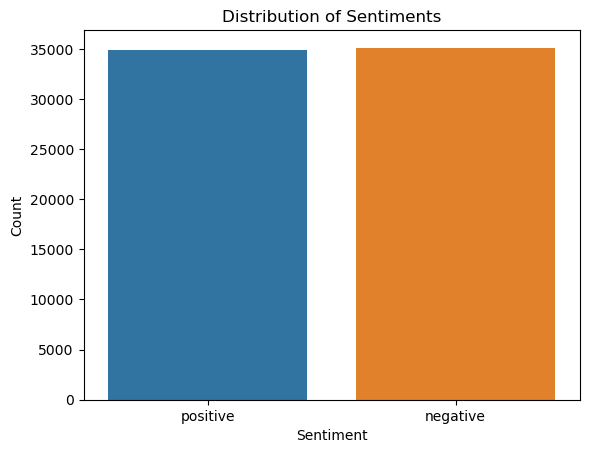

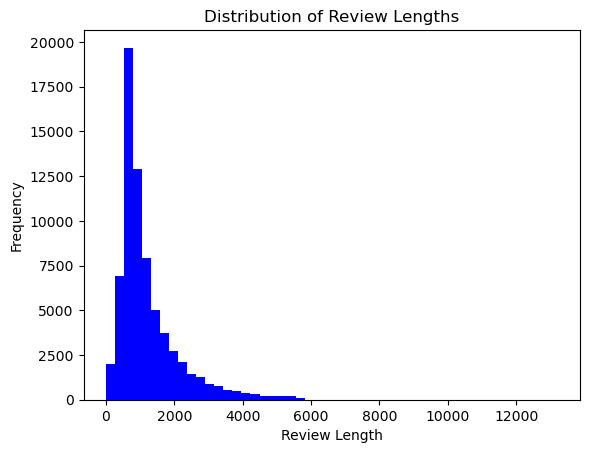

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('cleaned_augmented_IMDB_Dataset.csv', encoding='ISO-8859-1')

# Basic information about the dataset
print(df.info())
print(df.describe())

# Plot the distribution of the target variable
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Visualize the length of reviews
df['review_length'] = df['review'].apply(len)
plt.hist(df['review_length'], bins=50, color='blue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()
